## Assignment I: Exploratory Data Analysis

### 1. Import the dataset into a pandas dataframe. Make sure that the date column is in pandas date time format.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df["datetime"] = pd.to_datetime(df["datetime"])

In [4]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


### 2. Check the data type of each column. How many rows are there in the dataset? Does the dataset contain any missing values?

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [6]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

### 3. Using the date column, create new columns for: year, month, day of the week and hour of the day.

In [7]:
df["year"] = df["datetime"].dt.year
df["month"] = df["datetime"].dt.month
df["dayofweek"] = df["datetime"].dt.dayofweek
df["hour"] = df["datetime"].dt.hour

In [8]:
df[["datetime","year","month","dayofweek","hour"]].head()

,datetime,year,month,dayofweek,hour
0,2011-01-01 00:00:00,2011,1,5,0
1,2011-01-01 01:00:00,2011,1,5,1
2,2011-01-01 02:00:00,2011,1,5,2
3,2011-01-01 03:00:00,2011,1,5,3
4,2011-01-01 04:00:00,2011,1,5,4


### 4. Rename the values in the season column to spring, summer, fall and winter.

In [9]:
Season = {
    1: "spring",
    2: "summer",
    3: "fall",
    4: "winter"
}
df["season"] = df["season"].map(Season)

In [10]:
df["season"].value_counts()

season
winter    2734
summer    2733
fall      2733
spring    2686
Name: count, dtype: int64

### 5. Calculate the total number of casual and registered bikes rented in the years 2011 and 2012.

In [11]:
yearly_totals = df.groupby("year")[["casual","registered"]].sum()
print(yearly_totals)

      casual  registered
year                    
2011  155817      626162
2012  236318     1067179


### 6. Calculate the mean of the hourly total rentals count by season. Which season has the highest mean?

In [12]:
season_mean = df.groupby("season")["count"].mean().sort_values(ascending=False)
print(season_mean)

season
fall      234.417124
summer    215.251372
winter    198.988296
spring    116.343261
Name: count, dtype: float64


### 7. Are more bikes rented by registered users on working or non-working days? Does the answer differ for non-registered users? Is the answer the same for both years?

In [ ]:
# working day = 1
# non-working day = 0

In [13]:
wd_year = df.groupby(["year","workingday"])[["registered","casual"]].sum()
print(wd_year)

                 registered  casual
year workingday                    
2011 0               167492   83099
     1               458670   72718
2012 0               281343  122938
     1               785836  113380


### 8. Which months in the year 2011 have the highest and the lowest total number of bikes rented ? Repeat for the year 2012.

In [ ]:
# 2011

In [14]:
df_2011 = df[df["year"] == 2011]
month_totals_2011 = df_2011.groupby("month")["count"].sum()
print(month_totals_2011)

month
1     23552
2     32844
3     38735
4     50517
5     79713
6     89776
7     92848
8     83296
9     79104
10    79522
11    70889
12    61183
Name: count, dtype: int64


In [15]:
max_month_2011 = month_totals_2011.idxmax()
min_month_2011 = month_totals_2011.idxmin()
print("2011 highest month:", max_month_2011)
print("2011 lowest month:", min_month_2011)

2011 highest month: 7
2011 lowest month: 1


In [ ]:
# 2012

In [16]:
df_2012 = df[df["year"] == 2012]
month_totals_2012 = df_2012.groupby("month")["count"].sum()
print(month_totals_2012)

month
1      56332
2      66269
3      94766
4     116885
5     120434
6     130957
7     121769
8     130220
9     133425
10    127912
11    105551
12     98977
Name: count, dtype: int64


In [17]:
max_month_2012 = month_totals_2012.idxmax()
min_month_2012 = month_totals_2012.idxmin()
print("2012 highest month:", max_month_2012)
print("2012 lowest month:", min_month_2012)

2012 highest month: 9
2012 lowest month: 1


### 9. Which type of weather have the highest and lowest mean of the hourly total rentals count?

In [ ]:
# weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy - 2: Mist + Cloudy, 
# Mist + Broken clouds, Mist + Few clouds, Mist - 3: Light Snow, Light Rain + 
# Thunderstorm + Scattered clouds, Light Rain + Scattered clouds - 4: Heavy Rain +
# Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [18]:
weather_mean = df.groupby("weather")["count"].mean()
print(weather_mean)

weather
1    205.236791
2    178.955540
3    118.846333
4    164.000000
Name: count, dtype: float64


In [19]:
max_weather = weather_mean.idxmax()
min_weather = weather_mean.idxmin()
print("Highest mean rentals weather type:", max_weather)
print("Lowest mean rentals weather type:", min_weather)

Highest mean rentals weather type: 1
Lowest mean rentals weather type: 3


### 10. Calculate the correlation between the hourly total rentals count and all the numerical columns in the dataset. Which column has the highest correlation with the total rentals count?

In [20]:
corr_with_trcount = df.corr(numeric_only = True)["count"].sort_values(ascending = False)
print(corr_with_trcount)

count         1.000000
registered    0.970948
casual        0.690414
hour          0.400601
temp          0.394454
atemp         0.389784
year          0.260403
month         0.166862
windspeed     0.101369
workingday    0.011594
dayofweek    -0.002283
holiday      -0.005393
weather      -0.128655
humidity     -0.317371
Name: count, dtype: float64


### 11. Create a new categorical column called day_period, which can take four possible values: night, morning, afternoon and evening. These values correspond to the following binning of the hour column: 0-6: night, 6-12: morning, 12-6: afternoon, 6-24:evening.

In [21]:
def hour_to_period(hour):
    if 0 <= hour < 6:
        return "night"
    elif 6 <= hour < 12:
        return "morning"
    elif 12 <= hour < 18:
        return "afternoon"
    else:
        return "evening"

df["day_period"] = df["hour"].apply(hour_to_period)

In [22]:
df[["hour","day_period"]].head(24)

,hour,day_period
0,0,night
1,1,night
2,2,night
3,3,night
4,4,night
5,5,night
6,6,morning
7,7,morning
8,8,morning
9,9,morning


### 12. Generate a pivot table for the mean of the hourly total rentals count, with the index set to the day period and the column set to the working day column. What can you observe from the table?

In [23]:
pivot = pd.pivot_table(
    df,
    values = "count",
    index = "day_period",
    columns = "workingday",
    aggfunc = "mean"
)

print(pivot)

workingday           0           1
day_period                        
afternoon   371.022989  266.196141
evening     180.182759  251.054662
morning     157.772414  234.353763
night        44.052083   16.217582


## Assignment II: Data Visualization

### 1. Plot the distributions of all the numerical columns in the dataset using histograms.

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "whitegrid")

In [25]:
numeric_cols = df.select_dtypes(include = ["int64","float64"]).columns
print(numeric_cols)

Index(['holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity',
       'windspeed', 'casual', 'registered', 'count'],
      dtype='object')


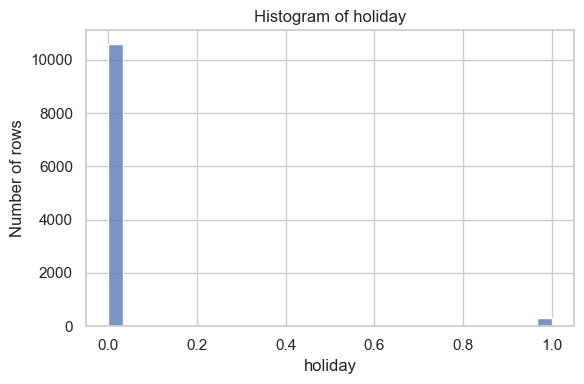

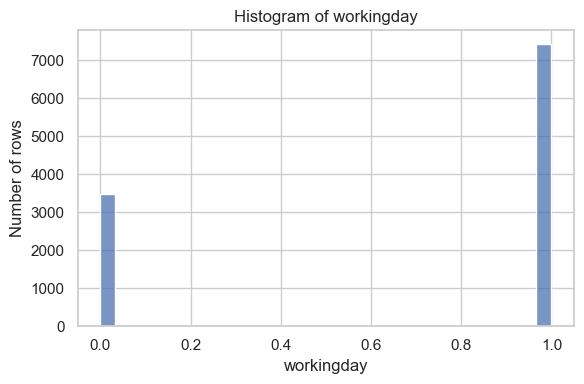

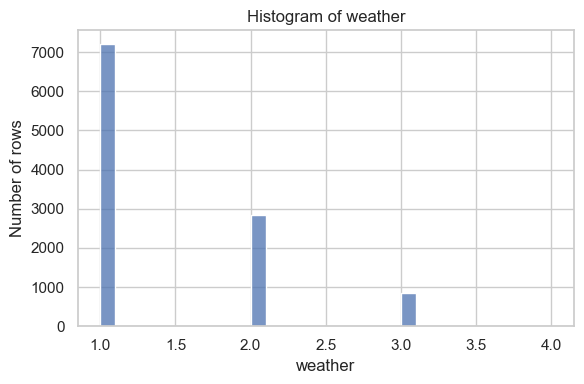

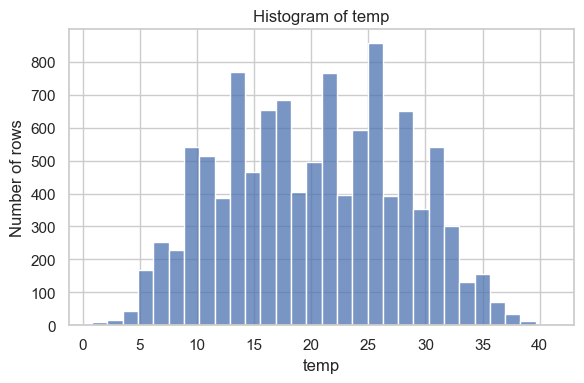

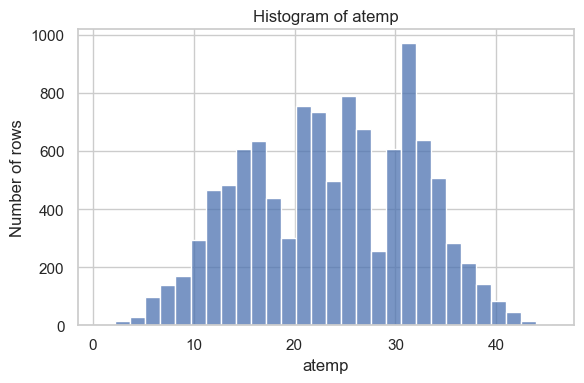

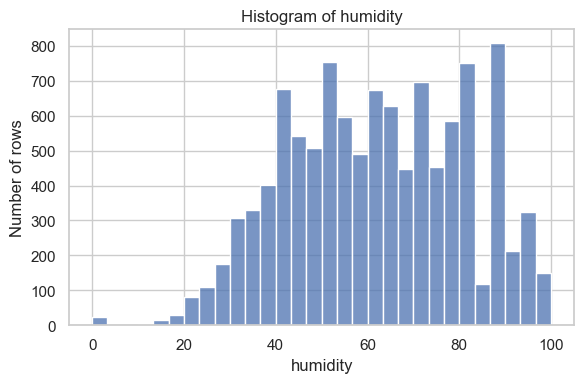

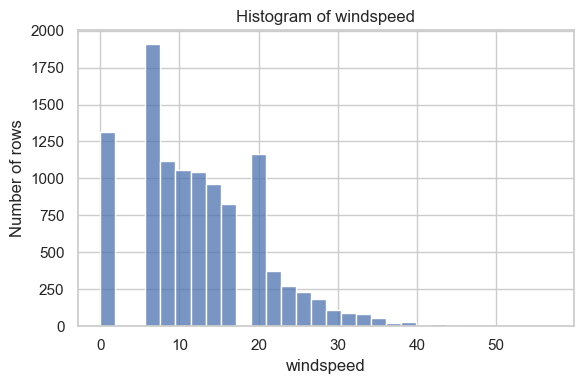

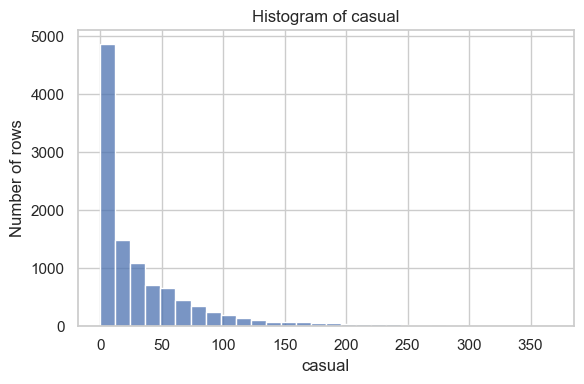

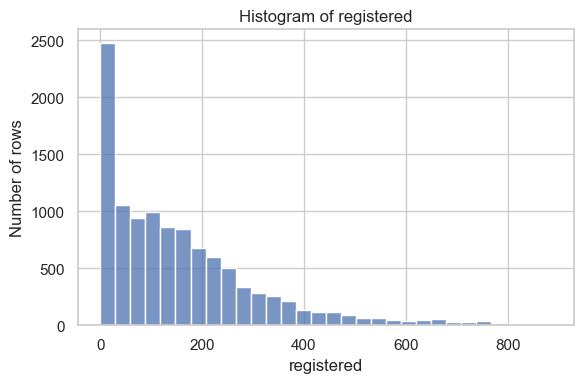

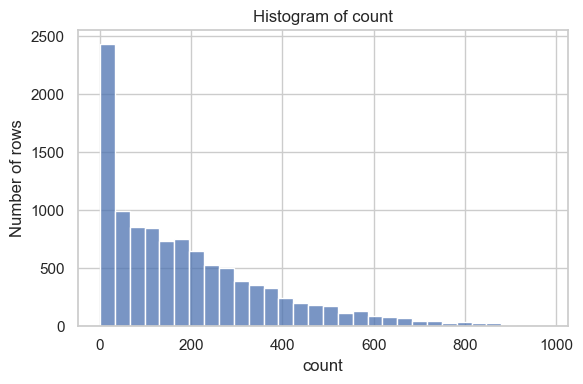

In [26]:
for col in numeric_cols:
    plt.figure(figsize = (6, 4))
    sns.histplot(df[col], bins = 30)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Number of rows")
    plt.tight_layout()
    plt.show()

### 2. Plot the distributions of all the numerical columns in the dataset using box plots.

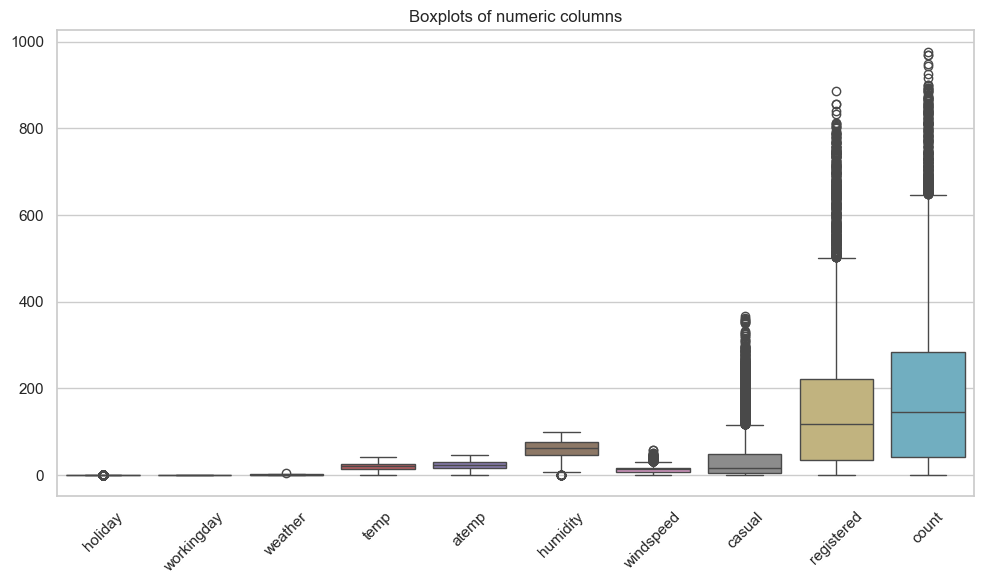

In [27]:
plt.figure(figsize = (10, 6))
sns.boxplot(data = df[numeric_cols])
plt.title("Boxplots of numeric columns")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

### 3.	Plot the the mean of the hourly total rentals count for working and non-working days.

In [28]:
mean_working = (
    df.groupby("workingday")["count"]
    .mean()
    .reset_index()
)

In [29]:
mean_working["workingday"] = mean_working["workingday"].map({
    0: "Non-working day",
    1: "Working day"
})

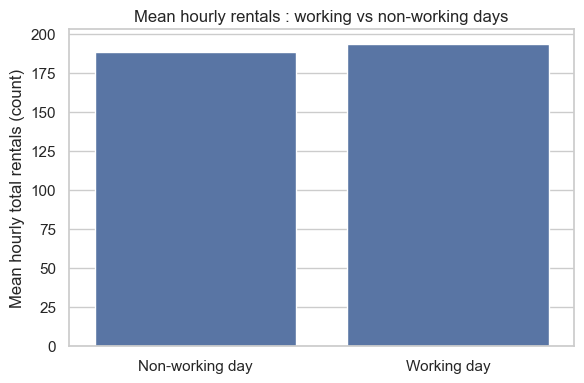

In [30]:
plt.figure(figsize = (6,4))
sns.barplot(data = mean_working, x = "workingday", y = "count")
plt.title("Mean hourly rentals : working vs non-working days")
plt.xlabel("")
plt.ylabel("Mean hourly total rentals (count)")
plt.tight_layout()
plt.show()

### 4.	Plot the the mean of the hourly total rentals count for the different months for both years combined.

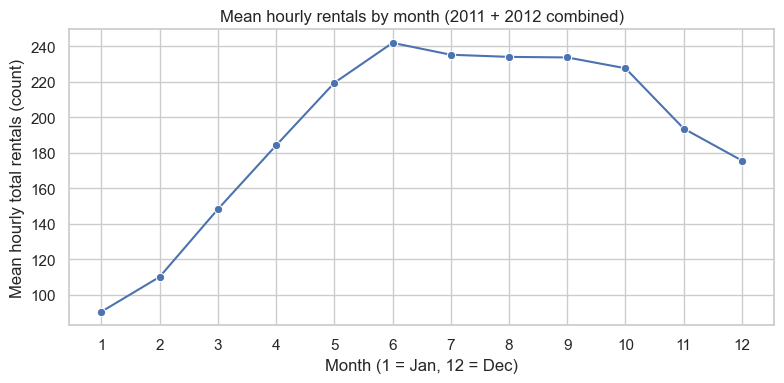

In [31]:
mean_month = (
    df.groupby("month")["count"]
    .mean()
    .reset_index()
)

plt.figure(figsize = (8, 4))
sns.lineplot(data = mean_month, x = "month", y = "count", marker = "o")
plt.title("Mean hourly rentals by month (2011 + 2012 combined)")
plt.xlabel("Month (1 = Jan, 12 = Dec)")
plt.ylabel("Mean hourly total rentals (count)")
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()  

### 5.	Plot the the mean of the hourly total rentals count for the different months for both years separately in a multi-panel figure.

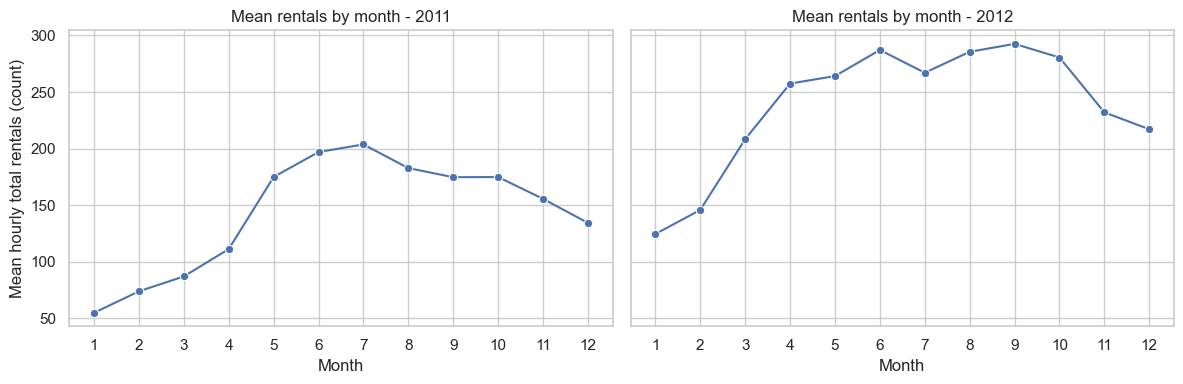

In [32]:
mean_month_year = (
    df.groupby(["year", "month"])["count"]
    .mean()
    .reset_index()
)

years = sorted(df["year"].unique())

fig, axes = plt.subplots(1, len(years), figsize = (12, 4), sharey = True)

for ax, yr in zip(axes, years):
    sub = mean_month_year[mean_month_year["year"] == yr]
    sns.lineplot(data = sub, x = "month", y = "count", marker = "o", ax = ax)
    ax.set_title(f"Mean rentals by month - {yr}")
    ax.set_xlabel("Month")
    ax.set_ylabel("Mean hourly total rentals (count)")
    ax.set_xticks(range(1, 13))

plt.tight_layout()
plt.show()

### 6.	Plot the the mean and the 95% confidence interval of the hourly total rentals count for the four different weather categories. What can you observe ?

In [ ]:
# weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy - 2: Mist + Cloudy,
# Mist + Broken clouds, Mist + Few clouds, Mist - 3: Light Snow, Light Rain +
# Thunderstorm + Scattered clouds, Light Rain + Scattered clouds - 4: Heavy Rain +
# Ice Pallets + Thunderstorm + Mist, Snow + Fog

/var/folders/_2/xbf9wc092zs5x8hy3j4bnyvr0000gn/T/ipykernel_64464/2951394778.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data = df, x = "weather", y = "count", ci = 95)


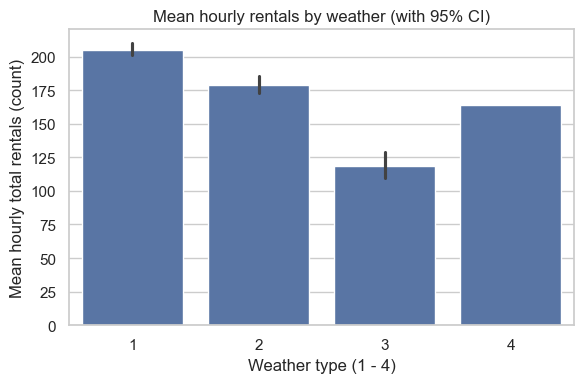

In [33]:
plt.figure(figsize = (6, 4))
sns.barplot(data = df, x = "weather", y = "count", ci = 95)
plt.title("Mean hourly rentals by weather (with 95% CI)")
plt.xlabel("Weather type (1 - 4)")
plt.ylabel("Mean hourly total rentals (count)")
plt.tight_layout()
plt.show()

### 7.	Plot the the mean of the hourly total rentals count versus the hour of the day. Which hours of the day have the highest rentals count?

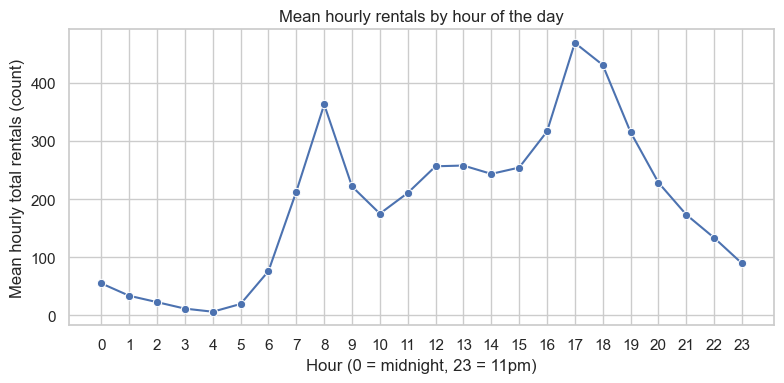

In [34]:
mean_hour = (
    df.groupby("hour")["count"]
    .mean()
    .reset_index()
)

plt.figure(figsize = (8, 4))
sns.lineplot(data = mean_hour, x = "hour", y = "count", marker = "o")
plt.title("Mean hourly rentals by hour of the day")
plt.xlabel("Hour (0 = midnight, 23 = 11pm)")
plt.ylabel("Mean hourly total rentals (count)")
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

### 8.	Repeat the plot in 7 for different days of the week. What patterns can you observe?

In [35]:
day_map = {
    0: "Mon",
    1: "Tue",
    2: "Wed",
    3: "Thu",
    4: "Fri",
    5: "Sat",
    6: "Sun"
}
df["dayofweek_name"] = df["dayofweek"].map(day_map)

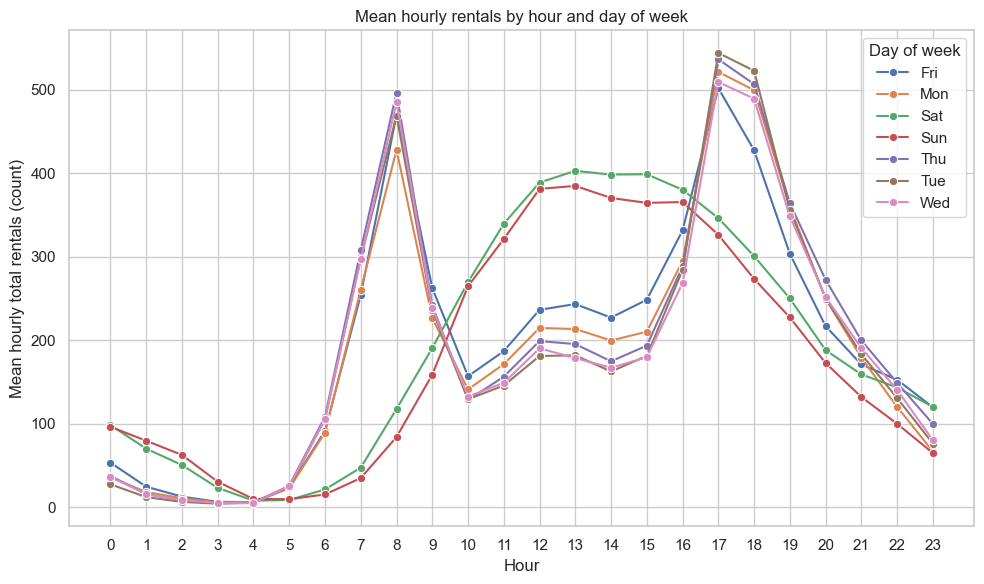

In [36]:
mean_hour_day = (
    df.groupby(["dayofweek_name", "hour"])["count"]
    .mean()
    .reset_index()
)

plt.figure(figsize = (10, 6))
sns.lineplot(
    data = mean_hour_day, 
    x = "hour", 
    y = "count", 
    hue= "dayofweek_name",
    marker = "o"
)
plt.title("Mean hourly rentals by hour and day of week")
plt.xlabel("Hour")
plt.ylabel("Mean hourly total rentals (count)")
plt.xticks(range(0, 24))
plt.legend(title = "Day of week")
plt.tight_layout()
plt.show()

### 9.	Repeat the plot in 8 for the four seasons using a multi-panel figure. What patterns can you observe?

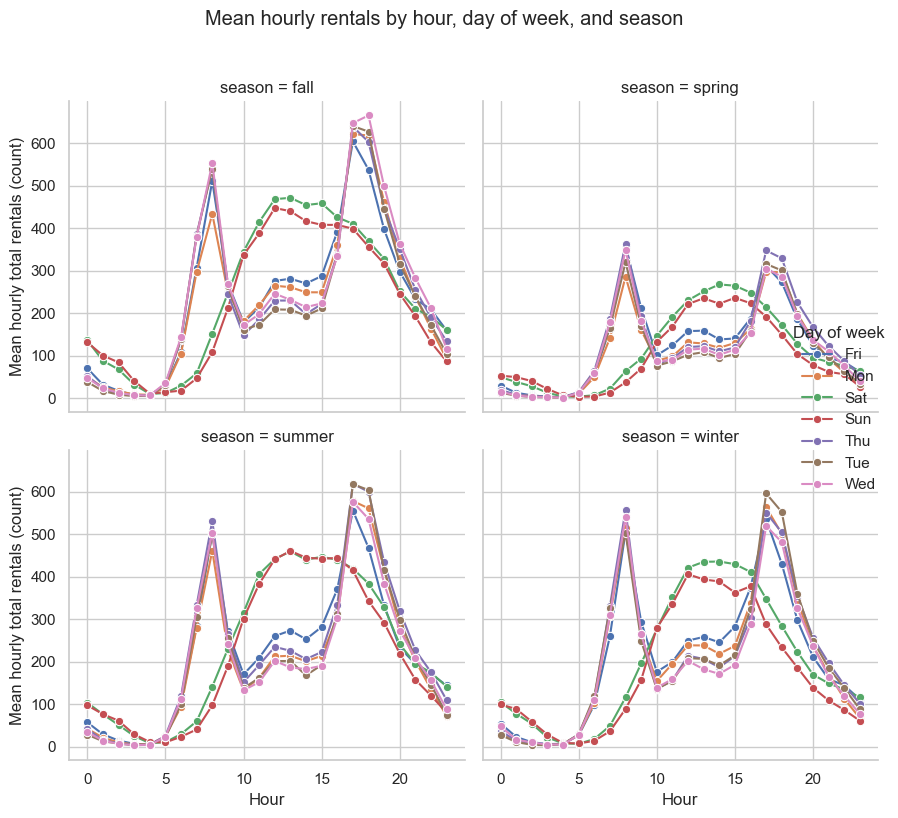

In [37]:
mean_hour_day_season = (
    df.groupby(["season", "dayofweek_name", "hour"])["count"]
    .mean()
    .reset_index()
)

g = sns.FacetGrid(
    mean_hour_day_season, 
    col = "season", 
    col_wrap = 2, 
    height = 4,
    sharey = True
)

g.map_dataframe(
    sns.lineplot,
    x = "hour", 
    y = "count", 
    hue= "dayofweek_name",
    marker = "o"
)

g.add_legend(title = "Day of week")
g.set_axis_labels("Hour", "Mean hourly total rentals (count)")
g.fig.suptitle("Mean hourly rentals by hour, day of week, and season", y = 1.02)
plt.tight_layout()
plt.show()

### 10.	Plot the the mean and the 95% confidence interval of the hourly total rentals count versus the period of the day column, which you created in the first part of the assignment. Which period of the day has the highest rentals count? Does this peak period differ for working and non-working days?

/var/folders/_2/xbf9wc092zs5x8hy3j4bnyvr0000gn/T/ipykernel_64464/4093168406.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(


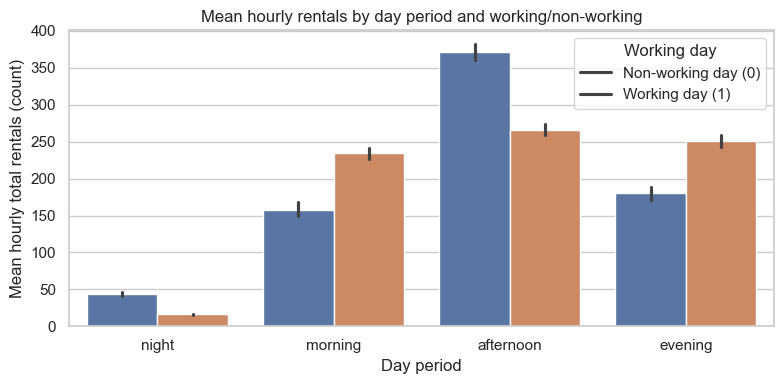

In [38]:
plt.figure(figsize = (8, 4))
sns.barplot(
    data = df,
    x = "day_period",
    y = "count",
    hue = "workingday",
    ci = 95
)

plt.title("Mean hourly rentals by day period and working/non-working")
plt.xlabel("Day period")
plt.ylabel("Mean hourly total rentals (count)")
plt.legend(
    title = "Working day",
    labels = ["Non-working day (0)", "Working day (1)"]
)

plt.tight_layout()
plt.show()

### 11.	Plot a heatmap for the correlation matrix of the dataset numerical variables. What observations can you make?

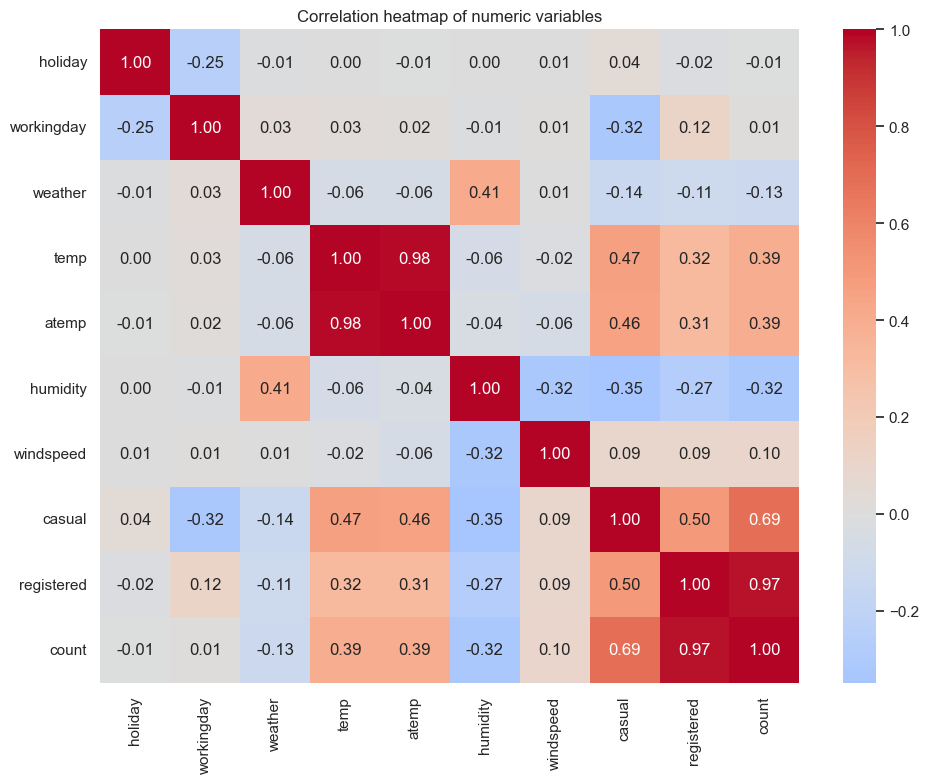

In [39]:
corr = df[numeric_cols].corr()
plt.figure(figsize = (10,8))
sns.heatmap(
    corr,
    annot = True,
    fmt = ".2f",
    cmap = "coolwarm",
    center = 0
)
plt.title("Correlation heatmap of numeric variables")
plt.tight_layout()
plt.show()

## Assignment III: Build & Publish an Interactive Dashboard

### Use Streamlit to create a an interactive dashboard that summarizes your findings on the dataset from assignments 1 and 2. The dashboards should have 4 - 6 plots and at least 3 intercative widgets. Publish your dashboard on the Streamlit Community Cloud.